In [10]:
import joblib
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Cargar el conjunto de datos de prueba desde el archivo CSV
df_test = pd.read_csv("../data/wines_test.csv")

# Mostrar el DataFrame cargado
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.320,0.27,1.4,0.049,38.0,173.0,0.99335,3.03,0.52,9.3,5,white
1,6.6,0.340,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7,white
2,6.4,0.320,0.35,4.8,0.030,34.0,101.0,0.99120,3.36,0.60,12.5,8,white
3,6.8,0.230,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,6,white
4,6.7,0.340,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.2,7,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5,white
1296,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,red
1297,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1,7,red
1298,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5,red


# PREDICCIONES MODELO CLASIFICACIÓN ELEGIDO EN TEST 

In [4]:
target_clf = "quality"

y_test_clf = df_test["quality"]



In [5]:
# Recuperamos el modelo de pipelines (version pickle)
with open('../models/modelo_pipeline_cat.pkl', 'rb') as archivo: # ojo read binario
    modelo_pipeline_clf = pickle.load(archivo)

In [6]:
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.320,0.27,1.4,0.049,38.0,173.0,0.99335,3.03,0.52,9.3,5,white
1,6.6,0.340,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7,white
2,6.4,0.320,0.35,4.8,0.030,34.0,101.0,0.99120,3.36,0.60,12.5,8,white
3,6.8,0.230,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,6,white
4,6.7,0.340,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.2,7,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5,white
1296,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,red
1297,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1,7,red
1298,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5,red


In [7]:
modelo_pipeline_clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocesado',
                                        Pipeline(steps=[('first_stage',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('Process_Numeric',
                                                                                          Pipeline(steps=[('Impute_Mean',
                                                                                                           SimpleImputer()),
                                                                                                          ('logaritmo',
                                                                                                           FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                               func=<ufunc 'log1p'>)),
                                                                                                          ('SScaler',
                                                                                                           StandardScaler())]),
                                                                                          ['volatile '
                                                                                           'acidity...
                                                                                          ['class']),
                                                                                         ('Exclude',
                                                                                          'drop',
                                                                                          ['fixed '
                                                                                           'acidity',
                                                                                           'residual '
                                                                                           'sugar',
                                                                                           'quality'])]))])),
                                       ('Modelo',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'Modelo__class_weight': [None, 'balanced'],
                         'Modelo__max_depth': [None, 1, 2, 4, 8],
                         'Modelo__max_features': ['sqrt', 1, 2, 3],
                         'Modelo__n_estimators': [10, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [8]:
print(classification_report(y_test_clf, modelo_pipeline_clf.predict(df_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.70      0.16      0.26        43
           5       0.74      0.70      0.72       432
           6       0.64      0.78      0.70       562
           7       0.67      0.55      0.60       210
           8       0.92      0.49      0.64        47

    accuracy                           0.68      1300
   macro avg       0.61      0.45      0.49      1300
weighted avg       0.69      0.68      0.67      1300



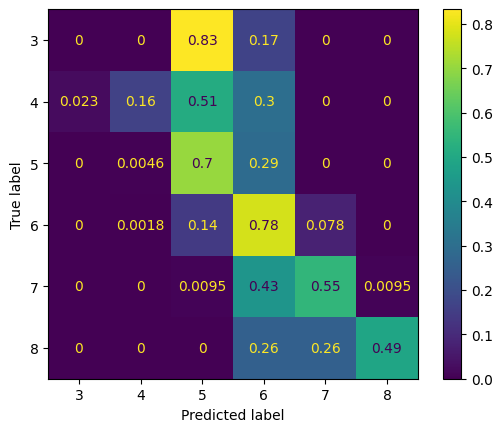

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test_clf, modelo_pipeline_clf.predict(df_test), normalize = "true")
# ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred)
plt.show()

In [ ]:
# Evaluación general del modelo:
# La precisión general del modelo es 0.68, lo que significa que el 68% de las predicciones fueron correctas.
# El macro promedio (macro avg) de F1-score es 0.49, lo que indica un rendimiento bajo cuando se promedian todas las clases por igual.
# El weighted avg (ponderado por la cantidad de ejemplos por clase) de F1-score es 0.67, reflejando un rendimiento más acorde con la 
# distribución de datos.
# Posibles mejoras:
# Balance de clases: La baja detección de la clase 3 indica que esta clase está subrepresentada.Sol: probar técnicas como oversampling (SMOTE).
# Probar otro modelo: red neuronal podría mejorar los resultados.

# PREDICCIÓN MODELO REGRESIÓN EN TEST

In [4]:
target_reg = "alcohol"

y_test_reg = df_test["alcohol"]

In [12]:
# Recuperamos el modelo de pipelines (version pickle)
with open('../models/modelo_pipeline_reg.pkl', 'rb') as archivo: # ojo read binario
    modelo_pipeline_reg = pickle.load(archivo)

In [13]:
modelo_pipeline_reg

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocesado',
                                        Pipeline(steps=[('first_stage',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('Process_Numeric',
                                                                                          Pipeline(steps=[('Impute_Mean',
                                                                                                           SimpleImputer()),
                                                                                                          ('logaritmo',
                                                                                                           FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                               func=<ufunc 'log1p'>)),
                                                                                                          ('SScaler',
                                                                                                           StandardScaler())]),
                                                                                          ['density',
                                                                                           'residua...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'Modelo__learning_rate': [0.1, 0.2, 0.5, 1.0],
                         'Modelo__max_depth': [1, 2, 4, 8],
                         'Modelo__n_estimators': [10, 100, 200, 400]},
             scoring='neg_mean_absolute_percentage_error')

In [ ]:
# El modelo nos da una predicción de alcohol con un error cuadrático medio de 0.38 


rmse = np.sqrt(mean_squared_error(y_test_reg, modelo_pipeline_reg.predict(df_test)))
print(f'RMSE: {rmse}')

RMSE: 0.3809415632307411
